# Run Functions

In [1]:
%run "Baseball Functions.ipynb"

# Imports and Data

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 334739
Length of phils_sc dataframe: 447037


# SEA (A) 82-84
## Game 1: Woo vs Phillips
Interesting one. I will be on the road.

## Game 2: Miller vs Allard
Yikes.

## Game 3: Gilbert vs Wheeler
Headliner.

In [3]:
# Ok some things to think about
po24 = pos[pos.game_year==2024]
pp24 = pps[pps.game_year==2024]
harper = pd.concat([pos[pos.player_name=='Harper, Bryce']
                    ,nphl[nphl.player_name=='Harper, Bryce']
                   ])

y = pd.DataFrame()
for p in pos.player_name.unique().tolist():
    x = pd.concat([pos[pos.player_name==p]
                   ,nphl[nphl.player_name==p]
                  ])
    print(p)
    y = pd.concat([y,x])
pos_by_player = y  

Blanco, Andrés
Francoeur, Jeff
Ruf, Darin
Franco, Maikel
Altherr, Aaron
Galvis, Freddy
Buchanan, David
Rupp, Cameron
Kratz, Erik
Asche, Cody
Herrera, Odúbel
Sweeney, Darnell
Ruiz, Carlos
d'Arnaud, Chase
Harang, Aaron
Bogusevic, Brian
De Fratus, Justin
Eickhoff, Jerad
Loewen, Adam
Nola, Aaron
Asher, Alec
Morgan, Adam
Howard, Ryan
Hernández, César
Brown, Domonic
Gómez, Jeanmar
Williams, Jerome
Utley, Chase
Neris, Hector
Danks, Jordan
Revere, Ben
Hamels, Cole
Billingsley, Chad
González, Severino
O'Sullivan, Sean
Araujo, Elvis
Correia, Kevin
Aumont, Phillippe
McGowan, Dustin
Sizemore, Grady
Paredes, Jimmy
Klein, Phil
Joseph, Tommy
Ellis, A.J.
Murray, Colton
Hellickson, Jeremy
Burriss, Emmanuel
Quinn, Roman
Alfaro, Jorge
Thompson, Jake
Bourjos, Peter
Goeddel, Tyler
Herrmann, Frank
Velasquez, Vince
Featherston, Taylor
Eflin, Zach
García, Luis
Oberholtzer, Brett
Ramos, Edubray
Lough, David
Morton, Charlie
Hunter, Cedric
Williams, Nick
Hoskins, Rhys
Pivetta, Nick
Crawford, J.P.
Knapp, Andrew
K

In [4]:
y.groupby(['batter','player_name']
          ,as_index=False
         ).agg({'des' : 'count'
                ,'game_pk' : 'nunique'
               }).sort_values(by='des',ascending=False).head(10)

,batter,player_name,des,game_pk
733,467793,"Santana, Carlos",22747,1308
1673,547180,"Harper, Bryce",22616,1312
2094,592206,"Castellanos, Nick",21598,1387
3742,656941,"Schwarber, Kyle",20388,1168
549,457705,"McCutchen, Andrew",19940,1133
2759,607208,"Turner, Trea",19834,1144
2192,592663,"Realmuto, J.T.",19351,1235
2250,593160,"Merrifield, Whit",17621,1093
1083,516416,"Segura, Jean",17257,1092
3691,656555,"Hoskins, Rhys",13725,723


2015


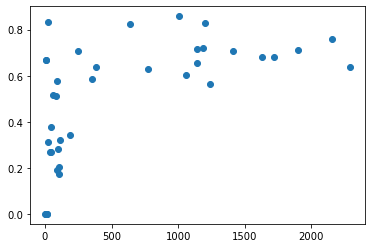

2016


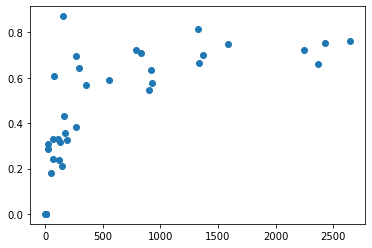

2017


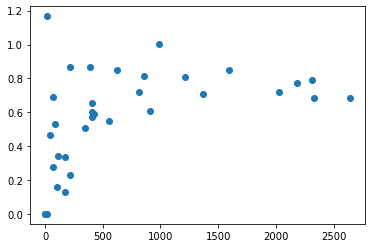

2018


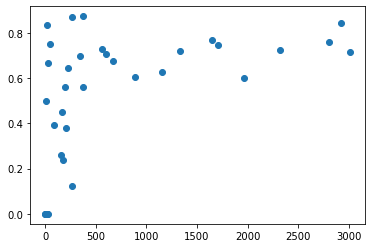

2019


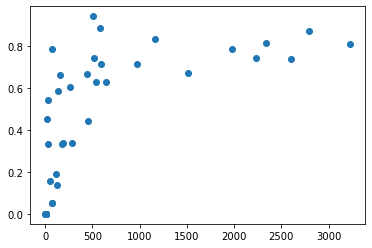

2020


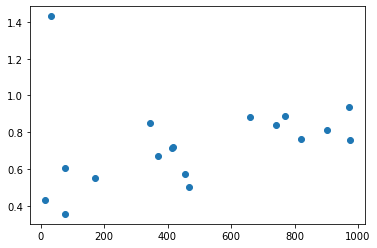

2021


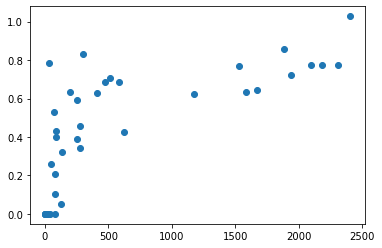

2022


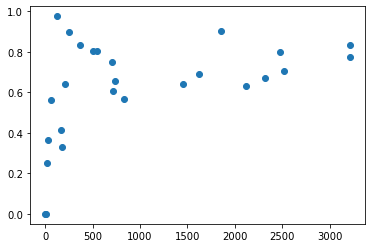

2023


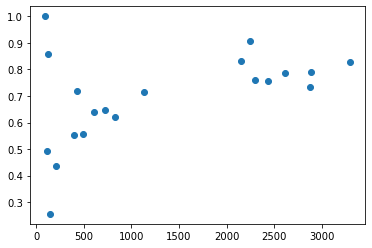

2024


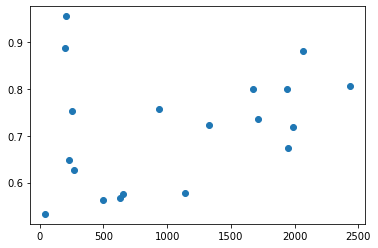

In [5]:
for gy in pos.game_year.unique().tolist():
    print(gy)
    df = pos[pos.game_year==gy]
    res = results('player_name')
    x = res.pitches
    y = res.ops
    plt.scatter(x,y)
    plt.show()
    
# #df = po24
# res = results('player_name').sort_values(by='ops',ascending=False)
# x = res.pitches
# y = res.ops
# plt.scatter(x,y)

In [6]:
# Is Castellanos's 15 pitch AB against Gilbert the longest in the statcast era?

In [7]:
pos.groupby(['game_pk','at_bat_number','player_name','game_date'],as_index=False
           ).agg({'des' : 'count'
                  ,'pitch_number' : 'max'
                 }).sort_values(by='pitch_number',ascending=False)

,game_pk,at_bat_number,player_name,game_date,des,pitch_number
27123,567071,6,"Realmuto, J.T.",2019-04-25,16,16
51982,745222,11,"Castellanos, Nick",2024-08-04,15,15
7655,447537,1,"Herrera, Odúbel",2016-05-23,14,14
32776,631652,64,"Gregorius, Didi",2020-08-19,14,14
37580,634144,47,"Segura, Jean",2021-05-11,14,14
...,...,...,...,...,...,...
52686,745539,26,"Stott, Bryson",2024-08-18,1,1
21504,530726,28,"Pivetta, Nick",2018-07-06,1,1
44180,662592,48,"Bohm, Alec",2022-04-29,1,1
7226,447362,10,"Goeddel, Tyler",2016-05-10,1,1


In [8]:
pos.sort_values(by='pitch_number',ascending=False)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
115236,FF,2019-04-25,93.7,1.81,5.93,"Realmuto, J.T.",592663,592761,strikeout,swinging_strike,...,0.719,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214
115237,FF,2019-04-25,92.4,1.83,5.97,"Realmuto, J.T.",592663,592761,NaN,foul,...,0.719,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214
207803,SL,2024-08-04,87.9,-1.18,5.67,"Castellanos, Nick",592206,669302,field_out,hit_into_play,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
207804,SL,2024-08-04,88.0,-1.17,5.62,"Castellanos, Nick",592206,669302,NaN,foul,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
115238,FF,2019-04-25,91.7,1.78,6.13,"Realmuto, J.T.",592663,592761,NaN,foul,...,0.719,0.870,1.217,1.529,1.940,0.2,-0.435,0.126,10.296,3.214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171549,SL,2022-05-08,83.2,-3.54,5.52,"Castellanos, Nick",592206,453286,NaN,blocked_ball,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
171550,CH,2022-05-08,82.5,-3.50,5.55,"Harper, Bryce",547180,453286,field_out,hit_into_play,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
79798,SI,2018-07-15,95.4,-1.44,5.88,"Knapp, Andrew",595284,570632,NaN,ball,...,0.720,0.880,1.247,1.578,2.031,0.2,-0.407,0.117,9.714,3.160
171552,CU,2022-05-08,71.8,-0.78,6.02,"Schwarber, Kyle",656941,605135,NaN,foul,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112


In [9]:
# No JT had a 16 pith AB in his first month as a Phillie.

In [10]:
# Is Bohm's K rate increasing?
# How do I prove it?

In [11]:
# Is Bryson Stott heating up? Hittig the ball harder or further?

# LAD (A) 85-87
## Game 1: Glasnow vs Nola
## Game 2: Kershaw vs Sanchez

In [12]:
hays = pos[pos.player_name=='Hays, Austin']
hays.groupby('pitcher',as_index=False).agg({'des' : 'count'})

,pitcher,des
0,434378,9
1,450203,7
2,471911,7
3,477132,7
4,519293,2
5,543339,1
6,543859,7
7,554340,5
8,572955,2
9,592454,6


In [13]:
# is the Sosa platoon worth it? how are his l/r splits? how about stott?
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]
df.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

,player_name,batter,des
0,"Clemens, Kody",665019,252
1,"Merrifield, Whit",593160,633
2,"Sosa, Edmundo",624641,937
3,"Stott, Bryson",681082,1952
4,"Wilson, Weston",642215,210


In [14]:
df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'R']
r = results('player_name')
r['stand'] = 'R'

df = po24[po24.batter.isin(pp24.fielder_4.unique().tolist())]

df = df[df.p_throws == 'L']
l = results('player_name')
l['stand'] = 'L'

z = pd.concat([r,l])
z[z.player_name.isin(['Sosa, Edmundo','Stott, Bryson'])]

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,stand
2,"Sosa, Edmundo",522,135,92,31,4.0,4,35,0.244,0.281,0.370,0.652,0.285,R
3,"Stott, Bryson",1507,371,283,81,9.0,33,53,0.246,0.313,0.377,0.690,0.303,R
2,"Sosa, Edmundo",415,109,76,29,3.0,7,23,0.293,0.358,0.535,0.893,0.383,L
3,"Stott, Bryson",445,109,70,21,1.0,14,24,0.226,0.330,0.290,0.621,0.287,L


In [15]:
sosa_id = 624641
stott_id = 681082
df = po24[po24.batter.isin([sosa_id,stott_id])]
defense = pp24[(pp24.fielder_4.isin([sosa_id,stott_id]))
               &(pp24.hit_location == 4)
              ]
defense.groupby('fielder_2',as_index=False).agg({'des' : 'count'
                                                 ,'at_bat_number' : 'nunique'
                                                 ,'game_pk' : 'nunique'
                                                })

,fielder_2,des,at_bat_number,game_pk
0,592663,217,73,71
1,596117,119,64,39
2,665561,32,22,10


In [16]:
pitchers_def4 = defense.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
                                               ,'at_bat_number' : 'count'
                                               ,'game_pk' : 'count'
                                              }).sort_values(by='des',ascending=False)
# pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'
#                                                             ,'game_pk' : 'nunique'
#                                                            })

In [17]:
df = pp24
res = results('player_name')
x = pitchers_def4.merge(res,how='left',on='player_name')
x['ratio'] = x.des/x.pitches
x['share'] = x.des/x.bip
x.sort_values(by='share',ascending=False)

,player_name,pitcher,des,at_bat_number,game_pk,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,ratio,share
15,"Lazar, Max",676661,6,6,6,119,28,21,4,1.0,1.0,6.0,0.148,0.179,0.296,0.475,0.207,0.050420,0.285714
23,"Ortiz, Luis F.",656814,1,1,1,10,4,4,3,0.0,0.0,0.0,0.750,0.750,0.750,1.500,0.664,0.100000,0.250000
3,"Turnbull, Spencer",605513,27,27,27,916,221,139,37,6.0,20.0,57.0,0.189,0.281,0.327,0.607,0.274,0.029476,0.194245
5,"Phillips, Tyler",663969,20,20,20,542,150,114,37,7.0,7.0,27.0,0.264,0.307,0.457,0.764,0.330,0.036900,0.175439
22,"Gilbert, Tyler",656457,1,1,1,42,9,7,2,0.0,1.0,1.0,0.250,0.333,0.375,0.708,0.315,0.023810,0.142857
14,"Allard, Kolby",663465,8,8,8,268,73,58,22,5.0,2.0,13.0,0.310,0.329,0.549,0.878,0.377,0.029851,0.137931
9,"Soto, Gregory",642397,13,13,13,649,163,95,36,2.0,18.0,44.0,0.265,0.368,0.375,0.743,0.333,0.020031,0.136842
18,"Banks, Tanner",621383,5,5,5,190,53,38,9,1.0,4.0,11.0,0.184,0.245,0.306,0.551,0.245,0.026316,0.131579
1,"Wheeler, Zack",554430,53,53,53,2657,666,429,119,17.0,45.0,183.0,0.195,0.258,0.330,0.588,0.261,0.019947,0.123543
0,"Nola, Aaron",605400,58,58,58,2703,701,492,155,24.0,43.0,161.0,0.238,0.287,0.403,0.690,0.301,0.021458,0.117886


In [18]:
res

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Allard, Kolby",268,73,58,22,5.0,2.0,13.0,0.310,0.329,0.549,0.878,0.377
1,"Alvarado, José",915,222,145,44,6.0,24.0,52.0,0.224,0.311,0.357,0.668,0.299
2,"Banks, Tanner",190,53,38,9,1.0,4.0,11.0,0.184,0.245,0.306,0.551,0.245
3,"Brogdon, Connor",76,14,5,3,2.0,6.0,3.0,0.375,0.643,1.250,1.893,0.681
4,"Domínguez, Seranthony",653,157,103,32,6.0,12.0,40.0,0.224,0.293,0.406,0.699,0.306
5,"Estévez, Carlos",210,56,39,10,1.0,2.0,14.0,0.189,0.232,0.264,0.496,0.223
6,"Gilbert, Tyler",42,9,7,2,0.0,1.0,1.0,0.250,0.333,0.375,0.708,0.315
7,"Hoffman, Jeff",883,233,138,42,5.0,14.0,78.0,0.195,0.249,0.316,0.565,0.250
8,"Kerkering, Orion",914,215,133,43,2.0,14.0,61.0,0.222,0.293,0.299,0.592,0.269
9,"Lazar, Max",119,28,21,4,1.0,1.0,6.0,0.148,0.179,0.296,0.475,0.207


In [19]:
pp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
cris_id=650911
df = cris = pps[pps.pitcher==cris_id]
ch = df[df.pitch_type=='CH']
ch.groupby('game_year',
           as_index=False
          ).agg({'release_speed' : ['mean','std','count','min','max']
                 ,'release_spin_rate' : ['mean','std','count','min','max']
                 ,'launch_speed' : ['mean','std','nunique','min','max']
                 ,'launch_angle' : ['mean','std','count','min','max']
                 #,'launch_speedangle' : ['mean','std','count','min','max']
                }).round(1)

game_year release_speed                        release_spin_rate         \
                     mean  std count   min   max              mean    std   
0      2021          85.0  1.2    45  82.1  87.6            1843.0  149.6   
1      2022          84.4  1.3   133  80.1  87.2            1914.3  162.8   
2      2023          81.9  1.3   492  77.8  85.0            1889.2  123.6   
3      2024          85.1  1.1   835  81.3  89.5            2029.8  128.7   

                 ... launch_speed                            launch_angle  \
  count     min  ...         mean   std nunique   min    max         mean   
0    45  1534.0  ...         76.9  18.2      10  40.0  101.0         -6.4   
1   133  1486.0  ...         81.7  12.7      36  57.2  103.5         -1.6   
2   492  1524.0  ...         75.2  17.2     117  17.5  112.9        -10.1   
3   835  1505.0  ...         78.3  16.1     220  25.5  111.7         -5.1   

                           
    std count   min   max  
0  33.2    10 -58.0  53.0  
1  31.6    37 -76.0  65.0  
2  32.3   136 -80.0  75.0  
3  32.4   279 -79.0  81.0  

[4 rows x 21 columns]

In [20]:
do24 = pd.read_csv('do24.csv')
dp24 = pd.read_csv('dp24.csv')

In [21]:
cris[cris.game_year==2024].groupby(['game_pk','game_date','home_team','away_team']
             ,as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                   ,'at_bat_number' : 'nunique'
                   ,'launch_speed' : 'mean'
                   ,'launch_angle' : 'mean'
                   ,'home_team' : 'max'
                   ,'post_home_score' : 'max'
                   ,'away_team' : 'max'
                   ,'post_away_score' : 'max'
                   ,'estimated_ba_using_speedangle' : 'sum'
                  }).sort_values(by='game_date',ascending=False).round(3)

,game_pk,game_date,des,inning,at_bat_number,launch_speed,launch_angle,home_team,post_home_score,away_team,post_away_score,estimated_ba_using_speedangle
3,745531,2024-08-29,105,6,26,81.845,17.289,PHI,0,ATL,4,7.073
24,747082,2024-08-22,95,6,27,79.014,0.171,ATL,3,PHI,1,4.176
4,745537,2024-08-17,99,9,29,75.971,-1.214,PHI,5,WSH,1,5.469
25,747166,2024-08-11,96,5,27,80.368,-7.297,AZ,5,PHI,2,7.854
18,746120,2024-08-06,89,7,25,79.984,4.432,LAD,1,PHI,4,6.665
5,745543,2024-07-31,94,6,25,82.835,3.129,PHI,3,NYY,4,8.085
6,745554,2024-07-26,88,6,29,80.598,1.095,PHI,1,CLE,3,6.582
2,745478,2024-07-20,90,6,24,88.442,13.312,PIT,2,PHI,0,7.522
7,745556,2024-07-10,91,6,24,79.136,1.361,PHI,4,LAD,2,5.471
22,746857,2024-07-04,79,5,22,82.676,2.560,CHC,5,PHI,2,6.399


## Game 3: Stone vs Phillips

In [22]:
# Has Bohm been punching out more? Yes
bohm = po24[po24.player_name == 'Bohm, Alec']
df = ks = bohm[bohm.events.isin(['strikeout','strikeout_double_play'])]
#bohm.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
204671,ST,2024-08-28,80.1,-2.27,4.92,"Bohm, Alec",664761,681293,strikeout,swinging_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
204738,SL,2024-08-27,88.4,-1.54,7.17,"Bohm, Alec",664761,434378,strikeout,swinging_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
204907,FF,2024-08-26,93.3,2.51,5.80,"Bohm, Alec",664761,687911,strikeout,called_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
205405,SI,2024-08-23,95.0,-1.61,6.31,"Bohm, Alec",664761,608379,strikeout,foul_tip,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
205978,FC,2024-08-18,89.4,-1.19,5.75,"Bohm, Alec",664761,606930,strikeout,swinging_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223014,SI,2024-04-06,90.8,-2.08,5.88,"Bohm, Alec",664761,663623,strikeout_double_play,swinging_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
223204,FC,2024-04-05,82.8,2.56,6.23,"Bohm, Alec",664761,571578,strikeout,swinging_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
223432,FF,2024-04-03,94.3,-2.32,5.82,"Bohm, Alec",664761,608371,strikeout,called_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
223805,FF,2024-03-31,96.2,3.23,5.17,"Bohm, Alec",664761,519242,strikeout,called_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168


In [23]:
trea = pd.concat([nphl[nphl.player_name == 'Turner, Trea'], pos[pos.player_name == 'Turner, Trea']])
trea

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
59820,SL,2022-10-15,82.0,-1.44,6.23,"Turner, Trea",607208,605397,field_out,hit_into_play,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
59821,SL,2022-10-15,82.3,-1.41,6.20,"Turner, Trea",607208,605397,NaN,ball,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
59822,FF,2022-10-15,92.6,-1.21,6.38,"Turner, Trea",607208,605397,NaN,ball,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
59823,SI,2022-10-15,91.8,-1.40,6.44,"Turner, Trea",607208,605397,double,hit_into_play,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
59824,FC,2022-10-15,91.0,-1.36,6.37,"Turner, Trea",607208,605397,NaN,swinging_strike,...,0.720,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224159,CH,2024-03-29,86.9,2.66,5.68,"Turner, Trea",607208,621345,NaN,called_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
224160,SL,2024-03-29,88.8,-1.75,5.89,"Turner, Trea",607208,675911,NaN,foul,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
224161,FF,2024-03-29,95.1,2.49,5.86,"Turner, Trea",607208,621345,NaN,called_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
224165,FF,2024-03-29,96.3,-1.77,5.87,"Turner, Trea",607208,675911,NaN,foul,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168


In [24]:
df = trea[(trea.home_team=='AZ')
          &(trea.game_type == 'R')
         ]
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Turner, Trea",556,153,117,47,8,14,22,0.338,0.399,0.626,1.025,0.431


In [25]:
df[df.game_type=='R'].groupby('player_name',as_index=False).agg({'game_pk' : 'nunique'})

,player_name,game_pk
0,"Turner, Trea",33


# ARI (A) 88-811
## Game 1: Montgomery vs Allard
Bats show up and the Phillies look good.

## Game 2: Nelson vs Wheeler
Trying to look at Phillies vs pitchers like Ryne Nelson. <br>
He throws so many FF, so I am looking just at that.

In [26]:
pos[pos.des.str.contains('Ryne Nelson')][['home_team','away_team','pitcher']]
nelson_id = 669194
pvn = phils_vs_nelson = pd.concat([pos[pos.pitcher == nelson_id], nphl[nphl.pitcher == nelson_id]])
df = pvn
res = results('player_name')

In [27]:
df = po24
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",1943,556,437,147,13.0,36.0,76,0.289,0.340,0.461,0.801,0.346
1,"Castellanos, Nick",1990,564,406,130,19.0,32.0,118,0.249,0.300,0.421,0.720,0.314
2,"Clemens, Kody",252,67,48,15,3.0,3.0,16,0.234,0.269,0.484,0.753,0.320
3,"Dahl, David",266,63,38,12,3.0,3.0,21,0.203,0.238,0.390,0.628,0.269
4,"Harper, Bryce",2063,522,352,130,26.0,56.0,113,0.281,0.358,0.524,0.882,0.379
5,"Hays, Austin",228,69,51,17,1.0,0.0,16,0.254,0.275,0.373,0.648,0.283
6,"Marchán, Rafael",195,56,44,15,3.0,3.0,8,0.294,0.339,0.549,0.888,0.377
7,"Marsh, Brandon",1715,400,223,86,14.0,41.0,134,0.244,0.320,0.416,0.736,0.322
8,"Merrifield, Whit",633,175,138,31,3.0,15.0,19,0.197,0.274,0.293,0.567,0.257
9,"Pache, Cristian",496,117,62,21,0.0,13.0,42,0.204,0.291,0.272,0.562,0.258


In [28]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Castellanos, Nick'
          ,'Marsh, Brandon'
          ,'Stott, Bryson'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",18,7,6.0,4.0,0.0,0.0,1.0,0.571,0.571,1.000,1.571,0.662
1,"Castellanos, Nick",44,9,6.0,1.0,0.0,1.0,2.0,0.143,0.222,0.143,0.365,0.175
4,"Harper, Bryce",35,9,7.0,4.0,1.0,0.0,2.0,0.444,0.444,0.778,1.222,0.523
5,"Marsh, Brandon",30,6,1.0,1.0,0.0,1.0,4.0,0.200,0.333,0.400,0.733,0.323
7,"Realmuto, J.T.",20,6,5.0,2.0,0.0,0.0,1.0,0.333,0.333,0.333,0.667,0.294
8,"Rojas, Johan",6,2,2.0,1.0,0.0,0.0,0.0,0.500,0.500,0.500,1.000,0.442
9,"Schwarber, Kyle",37,8,6.0,1.0,0.0,1.0,1.0,0.143,0.250,0.286,0.536,0.242
12,"Stott, Bryson",31,9,6.0,3.0,1.0,0.0,3.0,0.333,0.333,0.667,1.000,0.419
14,"Turner, Trea",39,13,11.0,3.0,0.0,0.0,2.0,0.231,0.231,0.385,0.615,0.259


In [29]:
rn = pd.read_csv('ryne_nelson.csv')
pitch_mix(rn)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,2519,94.654347,2215.081909,7.519254,55.8
2,FC,Cutter,658,88.567325,2256.908815,9.144377,14.6
0,CH,Changeup,514,83.213230,1805.470817,9.910506,11.4
4,SL,Slider,419,82.821957,2431.813842,10.236277,9.3
1,CU,Curveball,276,77.014130,2490.293478,9.369565,6.1
5,ST,Sweeper,131,81.846565,2440.351145,9.687023,2.9


In [30]:
rn24 = rn[rn.game_year==2024]
lhb_pitch_mix(rn24)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,489,94.825767,2211.783231,7.699387,52.0
0,CH,Changeup,178,83.129775,1958.365169,10.000000,18.9
2,FC,Cutter,177,91.463842,2173.627119,9.056497,18.8
1,CU,Curveball,91,77.517582,2476.967033,9.252747,9.7
5,ST,Sweeper,4,82.975000,2546.500000,7.500000,0.4
4,SL,Slider,2,83.450000,2429.500000,11.000000,0.2


In [31]:
rhb_pitch_mix(rn24)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,488,95.172746,2222.801230,7.436475,57.0
2,FC,Cutter,161,91.200000,2212.329193,9.223602,18.8
4,SL,Slider,141,84.897163,2446.652482,10.319149,16.5
5,ST,Sweeper,40,82.200000,2551.025000,10.850000,4.7
1,CU,Curveball,23,78.313043,2580.086957,9.347826,2.7
0,CH,Changeup,3,82.400000,1839.000000,7.333333,0.4


In [32]:
pm = rn.groupby('pitch_type',as_index=False
          ).agg({'release_speed' : ['mean','std']
                 ,'release_spin_rate' : ['mean','std']
                }).round(2)

In [33]:
ln = pd.concat([pos[pos.player_name.isin(lineup)], nphl[nphl.player_name.isin(lineup)]])

In [34]:
pt = 'FF'
muv = pm[pm.pitch_type == pt]['release_speed']['mean'].values[0]
stdv = pm[pm.pitch_type == pt]['release_speed']['std'].values[0]
mus = pm[pm.pitch_type == pt]['release_spin_rate']['mean'].values[0]
stds = pm[pm.pitch_type == pt]['release_spin_rate']['std'].values[0]
df = ln[(ln.p_throws == 'R')
        &(ln.pitch_type == pt)
        &(ln.release_speed >= (muv-(2*stdv)))
        &(ln.release_speed <= (muv+(2*stdv)))
        &(ln.release_spin_rate >= (mus-(2*stds)))
        &(ln.release_spin_rate <= (mus+(2*stds)))
       ]

In [35]:
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",1223,329,223,71,5,33,71,0.241,0.319,0.339,0.658,0.296
1,"Castellanos, Nick",2741,661,465,178,37,59,130,0.301,0.368,0.601,0.968,0.404
2,"Harper, Bryce",2946,664,404,166,37,126,131,0.312,0.441,0.613,1.054,0.442
3,"Marsh, Brandon",1174,253,139,61,8,31,81,0.277,0.368,0.464,0.831,0.362
4,"Realmuto, J.T.",2449,638,458,176,28,56,120,0.306,0.370,0.551,0.921,0.390
5,"Rojas, Johan",243,64,47,13,1,6,10,0.232,0.312,0.286,0.598,0.273
6,"Schwarber, Kyle",2848,664,395,141,54,88,177,0.249,0.351,0.588,0.939,0.391
7,"Stott, Bryson",1273,244,177,57,10,24,41,0.266,0.332,0.458,0.790,0.338
8,"Turner, Trea",2536,623,459,174,27,57,101,0.312,0.379,0.553,0.932,0.394


### Wheeler by inning

In [36]:
df = wheeler = pp24[pp24.player_name == 'Wheeler, Zack']
results('inning')

,inning,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,1,418,104,68,18,2.0,3.0,33,0.180,0.202,0.260,0.462,0.203
1,2,409,107,74,23,5.0,6.0,27,0.228,0.271,0.446,0.717,0.309
2,3,460,110,65,18,3.0,11.0,32,0.186,0.282,0.320,0.601,0.272
3,4,422,104,58,16,1.0,8.0,36,0.172,0.250,0.258,0.508,0.232
4,5,428,109,71,25,3.0,7.0,28,0.253,0.312,0.444,0.756,0.327
5,6,314,79,54,11,2.0,5.0,18,0.155,0.228,0.282,0.510,0.229
6,7,185,47,35,7,1.0,5.0,7,0.167,0.255,0.238,0.493,0.230
7,8,21,6,4,1,0.0,0.0,2,0.167,0.167,0.167,0.333,0.148


In [37]:
wheeler[(wheeler.game_pk == wheeler.game_pk.max())
        &(wheeler.pitch_number == 1)
       ].groupby(['description'
                 #,'pitch_type'
                 ],as_index=False
                ).agg({'des' : 'count'})

,description,des
0,ball,8
1,called_strike,8
2,foul,4
3,foul_bunt,1
4,hit_into_play,2
5,swinging_strike,2


### Phillies single season doubles and HRs leaders

In [38]:
dbls = pos[pos.events=='double']
dbls.groupby(['player_name','game_year'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(10)

,player_name,game_year,des
20,"Bohm, Alec",2024,44
74,"Harper, Bryce",2021,42
92,"Herrera, Odúbel",2017,42
203,"Turner, Trea",2023,40
31,"Castellanos, Nick",2023,39
98,"Hoskins, Rhys",2018,38
182,"Segura, Jean",2019,37
72,"Harper, Bryce",2019,36
160,"Realmuto, J.T.",2019,36
75,"Harper, Bryce",2022,35


In [39]:
events = ['home_run','triple','double','single']
y = pd.DataFrame()
for e in events:
    x = pos[pos.events == e].groupby(['player_name','game_year']).agg({'des' : 'count'})
    x.rename(columns = {'des' : e}, inplace=True)
    print(x.sort_values(by=e,ascending=False).head(10))

                             home_run
player_name       game_year          
Schwarber, Kyle   2023             52
                  2022             52
Hoskins, Rhys     2022             36
Harper, Bryce     2019             35
                  2021             35
Hoskins, Rhys     2018             34
Castellanos, Nick 2023             34
Turner, Trea      2023             29
Hoskins, Rhys     2019             29
Schwarber, Kyle   2024             28
                            triple
player_name      game_year        
Hernández, César 2016           11
Bourjos, Peter   2016            7
Marsh, Brandon   2023            6
Revere, Ben      2015            6
Galvis, Freddy   2017            6
Hernández, César 2017            6
Herrera, Odúbel  2016            6
Hoskins, Rhys    2019            5
Turner, Trea     2023            5
Realmuto, J.T.   2022            5
                             double
player_name       game_year        
Bohm, Alec        2024           44
Harper, Bryce   

In [40]:
bohm = pos[pos.player_name == 'Bohm, Alec']
bohm[bohm.events=='home_run'].groupby('game_year',as_index=False).agg({'des' : 'count'})

,game_year,des
0,2020,4
1,2021,7
2,2022,14
3,2023,21
4,2024,13


In [41]:
df = bohm[bohm.events.isin(events)]
x = df.groupby(['game_year','events']
           ,as_index=False).agg({'des' : 'count'}
                               )
x


,game_year,events,des
0,2020,double,11
1,2020,home_run,4
2,2020,single,39
3,2021,double,15
4,2021,home_run,7
5,2021,single,72
6,2022,double,29
7,2022,home_run,14
8,2022,single,131
9,2022,triple,3


In [42]:
pitch_mix(rn[rn.game_year==2024])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,977,94.999079,2217.286592,7.568066,54.4
2,FC,Cutter,338,91.338166,2192.062130,9.136095,18.8
0,CH,Changeup,181,83.117680,1956.386740,9.955801,10.1
4,SL,Slider,143,84.876923,2446.412587,10.328671,8.0
1,CU,Curveball,114,77.678070,2497.771930,9.271930,6.3
5,ST,Sweeper,44,82.270455,2550.613636,10.545455,2.4


In [43]:
wheeler_ff = wheeler[wheeler.pitch_type == 'FF']
df = wheeler_ff.reset_index().reset_index()
df['cum'] = ''
run = 0
for i in range(len(df)):
    run+=df['release_spin_rate'].iloc[i]
    try:
        run/df['level_0'].iloc[i]
    except:
        df['cum'].iloc[i] = run
    else:
        df['cum'].iloc[i] = run/df['level_0'].iloc[i]
    

In [44]:
pos[pos.des.str.contains('Puk')][['des','home_team','away_team','pitcher']]

,des,home_team,away_team,pitcher
189154,Alec Bohm singles on a sharp line drive to rig...,MIA,PHI,640462


In [45]:
puk_id = 640462
df = pd.concat([pos[pos.pitcher==puk_id],nphl[nphl.pitcher==puk_id]])
df = df[df.player_name.isin(['Stott, Bryson', 'Sosa, Edmundo','Rojas, Johan'])]
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Rojas, Johan",10,3,2,1,0.0,0.0,1,0.333,0.333,0.667,1.000,0.420
1,"Sosa, Edmundo",17,5,3,1,0.0,0.0,2,0.200,0.200,0.200,0.400,0.177
2,"Stott, Bryson",20,4,1,1,0.0,1.0,2,0.333,0.500,0.667,1.167,0.488


In [46]:
df[df.player_name == 'Rojas, Johan'][['pitch_type','type','inning','game_date','release_speed'
                                      ,'release_spin_rate','launch_speed', 'launch_angle','estimated_ba_using_speedangle'
                                      ,'hit_location'
                                     ]]

,pitch_type,type,inning,game_date,release_speed,release_spin_rate,launch_speed,launch_angle,estimated_ba_using_speedangle,hit_location
186544,FF,S,6,2023-07-31,96.9,2209.0,NaN,NaN,NaN,2.0
186550,SI,S,6,2023-07-31,95.6,2089.0,77.5,11.0,NaN,NaN
186557,FF,S,6,2023-07-31,95.1,2053.0,NaN,NaN,NaN,NaN
207104,FF,X,8,2024-08-09,95.8,2312.0,95.6,23.0,0.211,7.0
207105,FF,S,8,2024-08-09,96.6,2424.0,NaN,NaN,NaN,NaN
207109,FF,S,8,2024-08-09,94.0,2236.0,NaN,NaN,NaN,NaN
212040,SL,X,7,2024-06-29,84.9,2303.0,99.0,-4.0,0.283,6.0
212043,FF,B,7,2024-06-29,97.9,2251.0,NaN,NaN,NaN,NaN
212051,SL,S,7,2024-06-29,86.4,2230.0,88.8,-46.0,NaN,NaN
212054,FF,S,7,2024-06-29,97.0,2264.0,NaN,NaN,NaN,NaN


In [47]:
gas = pps[pps.release_speed >= 95]
gas.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False).reset_index(
drop=True).head(25)

,player_name,des
0,"Wheeler, Zack",6440
1,"Alvarado, José",2711
2,"Domínguez, Seranthony",2604
3,"García, Luis",1670
4,"Velasquez, Vince",1625
5,"Pivetta, Nick",1620
6,"Neris, Hector",1060
7,"Soto, Gregory",968
8,"Eflin, Zach",794
9,"Hoffman, Jeff",731


In [48]:
xfinity = pp24[pp24.release_speed >= 95]
xfinity.groupby('player_name',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,player_name,des
17,"Wheeler, Zack",843
0,"Alvarado, José",572
5,"Kerkering, Orion",415
4,"Hoffman, Jeff",403
2,"Domínguez, Seranthony",386
13,"Soto, Gregory",349
15,"Sánchez, Cristopher",318
12,"Ruiz, José",313
7,"Marte, Yunior",207
3,"Estévez, Carlos",126


### Brandon Marsh and his Sweet Spot%?

In [49]:
swsps = po24[(po24.launch_angle >= 8)
     &(po24.launch_angle<= 32)
    ].groupby('player_name',as_index=False).agg({'des' : 'count'}
                                               ).rename(columns = {'des' : 'swsp'})
     

In [50]:
df = po24
res = results('player_name')

In [51]:
z = swsps.merge(res,on='player_name')
z['pct'] = z.swsp/z.bip
z.sort_values(by='pct',ascending=False).round(3)

,player_name,swsp,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,pct
3,"Dahl, David",30,266,63,38,12,3.0,3.0,21,0.203,0.238,0.390,0.628,0.269,0.789
7,"Marsh, Brandon",172,1715,400,223,86,14.0,41.0,134,0.244,0.320,0.416,0.736,0.322,0.771
16,"Stubbs, Garrett",68,654,162,100,30,1.0,15.0,42,0.210,0.302,0.273,0.575,0.267,0.680
6,"Marchán, Rafael",28,195,56,44,15,3.0,3.0,8,0.294,0.339,0.549,0.888,0.377,0.636
10,"Realmuto, J.T.",144,1330,348,240,83,11.0,21.0,82,0.258,0.310,0.413,0.723,0.317,0.600
15,"Stott, Bryson",210,1952,480,353,102,10.0,47.0,77,0.242,0.317,0.358,0.674,0.299,0.595
4,"Harper, Bryce",209,2063,522,352,130,26.0,56.0,113,0.281,0.358,0.524,0.882,0.379,0.594
2,"Clemens, Kody",28,252,67,48,15,3.0,3.0,16,0.234,0.269,0.484,0.753,0.320,0.583
1,"Castellanos, Nick",231,1990,564,406,130,19.0,32.0,118,0.249,0.300,0.421,0.720,0.314,0.569
9,"Pache, Cristian",35,496,117,62,21,0.0,13.0,42,0.204,0.291,0.272,0.562,0.258,0.565


In [52]:
# Hoffman gives up a bomb on the first pitch in the 9th. Ballgame.

## Game 3: Gallen vs Nola

In [53]:
df = nola = pps[pps.player_name == 'Nola, Aaron']
df = nola[nola.home_team == 'AZ']
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Nola, Aaron",358,101,74,34,4,5,20,0.362,0.396,0.585,0.981,0.418


In [54]:
gallen_id = pos[(pos.game_date == '2023-10-16')
                &(pos.inning == 1)
               ].pitcher.unique()[0]
df = phils_vs_zg = pd.concat([pos[pos.pitcher==gallen_id],nphl[nphl.pitcher==gallen_id]])
res = results('player_name')

In [55]:
res

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Alfaro, Jorge",26,6,4.0,3.0,0.0,0.0,2.0,0.500,0.500,0.833,1.333,0.568
1,"Bohm, Alec",47,14,11.0,1.0,0.0,2.0,0.0,0.091,0.286,0.091,0.377,0.214
2,"Castellanos, Nick",48,12,8.0,2.0,1.0,2.0,2.0,0.200,0.333,0.500,0.833,0.357
3,"Clemens, Kody",18,3,3.0,1.0,0.0,0.0,0.0,0.333,0.333,0.333,0.667,0.294
4,"Dahl, David",17,6,4.0,0.0,0.0,0.0,2.0,0.000,0.000,0.000,0.000,0.000
5,"Dickerson, Corey",7,2,1.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
6,"Galvis, Freddy",2,1,1.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
7,"Gregorius, Didi",20,4,4.0,1.0,0.0,0.0,0.0,0.250,0.250,0.500,0.750,0.315
8,"Harper, Bryce",92,22,17.0,10.0,2.0,2.0,3.0,0.500,0.545,0.850,1.395,0.583
9,"Haseley, Adam",7,2,1.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000


In [56]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Marsh, Brandon'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Stubbs, Garrett'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)]

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
1,"Bohm, Alec",47,14,11.0,1.0,0.0,2.0,0.0,0.091,0.286,0.091,0.377,0.214
2,"Castellanos, Nick",48,12,8.0,2.0,1.0,2.0,2.0,0.200,0.333,0.500,0.833,0.357
8,"Harper, Bryce",92,22,17.0,10.0,2.0,2.0,3.0,0.500,0.545,0.850,1.395,0.583
15,"Marsh, Brandon",37,10,7.0,3.0,0.0,0.0,3.0,0.300,0.300,0.300,0.600,0.265
21,"Rojas, Johan",20,6,6.0,1.0,0.0,0.0,0.0,0.167,0.167,0.333,0.500,0.207
23,"Schwarber, Kyle",74,17,10.0,4.0,3.0,3.0,4.0,0.286,0.412,0.929,1.340,0.532
25,"Stott, Bryson",53,14,12.0,4.0,0.0,1.0,1.0,0.308,0.357,0.308,0.665,0.302
26,"Stubbs, Garrett",33,7,4.0,2.0,0.0,0.0,3.0,0.286,0.286,0.429,0.714,0.306
28,"Turner, Trea",120,29,19.0,6.0,1.0,2.0,8.0,0.222,0.276,0.444,0.720,0.307


In [57]:
df[df.player_name == 'Bohm, Alec']#.groupby('events',as_index=False).agg({'des' : 'count'})

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP,source
156404,FF,2022-08-30,94.3,-2.98,5.96,"Bohm, Alec",664761,668678,field_out,hit_into_play,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
156438,FC,2022-08-30,88.4,-3.07,5.90,"Bohm, Alec",664761,668678,field_out,hit_into_play,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
156439,FC,2022-08-30,88.4,-3.02,5.94,"Bohm, Alec",664761,668678,NaN,ball,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
156482,FF,2022-08-30,95.3,-2.61,6.04,"Bohm, Alec",664761,668678,grounded_into_double_play,hit_into_play,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
156484,FF,2022-08-30,94.5,-2.61,6.09,"Bohm, Alec",664761,668678,NaN,ball,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
156486,KC,2022-08-30,81.9,-2.92,5.94,"Bohm, Alec",664761,668678,NaN,foul,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
156489,KC,2022-08-30,82.8,-2.85,5.89,"Bohm, Alec",664761,668678,NaN,blocked_ball,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
156490,FF,2022-08-30,95.1,-2.91,5.98,"Bohm, Alec",664761,668678,NaN,called_strike,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
156493,FF,2022-08-30,94.4,-2.94,5.96,"Bohm, Alec",664761,668678,NaN,called_strike,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN
166936,FF,2022-06-10,94.5,-2.87,5.94,"Bohm, Alec",664761,668678,walk,blocked_ball,...,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112,NaN


## Game 4: Kelly vs Sanchez

Good ABs from the Phillies but nothing to show for it? Idk the team is just struggling rn

# Dylan Floro

In [58]:
pos[pos.des.str.contains('Floro')][['des','pitcher','home_team','away_team']]
floro = 571670
df = pd.concat([pos[pos.pitcher==floro],nphl[nphl.pitcher==floro]])
res = results('player_name')
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
         ]
res[res.player_name.isin(lineup)]

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
11,"Harper, Bryce",18,4,3.0,1.0,0.0,1.0,0.0,0.333,0.500,0.333,0.833,0.394
32,"Schwarber, Kyle",25,6,1.0,0.0,0.0,2.0,3.0,0.000,0.333,0.000,0.333,0.231
38,"Turner, Trea",24,8,8.0,3.0,0.0,0.0,0.0,0.375,0.375,0.375,0.750,0.331


In [59]:
# wtf was that Trea?

Damn. Tough one for the Fightins.

# JT and Harp Total Bases Algorithm
age - lookup?
<br>game_pk : nunique - the distinct count of game ids in the dataset
<br>hit_weight : sum - the sum of my calculated hit_weight column

def hit_weight():
    

# SQL Attempt
That is my shit

```sql
select pn.player_name
      ,pn.batter
      ,max(pn.age) age
      ,count(distinct game_pk) games
      ,case when events = 'single' then 1
            when events = 'double' then 2
            when events = 'triple' then 3
            when events = 'home_run' then 4
            end as total_bases
      ,'Phillies' as team
      ,count(distinct game_year) seasons
from pn
```

In [60]:
x = pos[pos.events.isin(['home_run','triple','double','single'])]
#x['hit_weight'] = x

# Chat GPT Response to Prompt - "Turn this SQL query into a pandas function"

In [61]:
def process_data(df):
    # Map the events to total bases
    event_to_bases = {
        'single': 1,
        'double': 2,
        'triple': 3,
        'home_run': 4
    }
    
    # Add a column for total bases based on events
    df['total_bases'] = df['events'].map(event_to_bases)
    
    # Group by player_name and batter and calculate the required aggregations
    result = df.groupby(['player_name', 'batter']).agg(
        age=('age', 'max'),
        games=('game_pk', 'nunique'),
        total_bases=('total_bases', 'max'),  # Assumes one total_bases value per player in a game
        seasons=('game_year', 'nunique')
    ).reset_index()
    
    # Add a constant column for team
    result['team'] = 'Phillies'
    
    return result

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data into a DataFrame
# result_df = process_data(df)
# print(result_df)

# MIA (H) 813-814
Feels like a big series, good opportunity to rack up some wins against the bottom-feeding Marlins.

## Game 1: Bellozo vs Walker
Taijuan Walker makes his long-awaited return to the Phillies rotation on this Tuesday evening as the ballclub welcomes the last-place Miami Marlins to Citizens Bank Park. Walker has not faced many of the Marlins hitters before, many of them are new to the big leagues. This should be a chance to get Tai back into the rhythm of things.

## Game 2: Cabrera vs Phillips

Schwarber grand slam is a huge momentum swing, Phillies have some hope again.

# Runs For and Runs Against Trend Line

In [62]:
rf = pp24.groupby(['game_pk'
                   ,'game_date'
                  ]
                   ,as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [63]:
hrf = rf[rf.home_team == 'PHI']
hrf.rename(columns = {'home_team' : 'team'
                      ,'post_home_score' : 'runs'}
          ,inplace=True)

In [64]:
arf = rf[rf.away_team == 'PHI']
arf.rename(columns = {'away_team' : 'team'
            ,'post_away_score' : 'runs'}
          ,inplace=True)

In [65]:
ra = po24.groupby(['game_pk','game_date'],as_index=False).agg({'home_team' : 'max'
                                            ,'post_home_score' : 'max'
                                            ,'away_team' : 'max'
                                            ,'post_away_score' : 'max'
                                           })

In [66]:
hra = ra[ra.home_team == 'PHI']
hra.rename(columns = {'home_team' : 'team'
                      ,'post_away_score' : 'runs'
                     },inplace=True)
ara = ra[ra.away_team == 'PHI']
ara.rename(columns = {'away_team' : 'team'
                      ,'post_home_score' : 'runs'
                     },inplace=True)

In [67]:
rfs = pd.concat([hrf[['game_pk','game_date','team','runs']]
                 ,arf[['game_pk','game_date','team','runs']]
                ])
rfs['date'] = pd.to_datetime(rfs.game_date)

In [68]:
ras = pd.concat([hra[['game_pk','game_date','team','runs']]
                 ,ara[['game_pk','game_date','team','runs']]
                ])
ras['date'] = pd.to_datetime(ras.game_date)

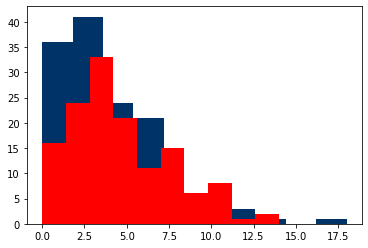

In [69]:
plt.hist(ras.runs,color = '#003469')
plt.hist(rfs.runs,color = '#ff0000')
plt.show()

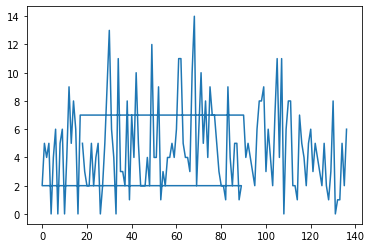

In [70]:
plt.plot(rfs.runs)

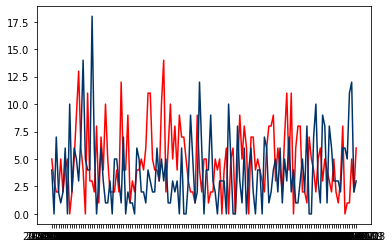

In [71]:
plt.plot(rfs.game_date.values,rfs.runs.values, color = '#ff0000')
plt.plot(ras.game_date.values,ras.runs.values, color = '#003469')
plt.show()

Might be good to try some running averages here to accomplish smoothing?

# Schwarber OBP by Year

In [72]:
df = pd.concat([pos[pos.player_name == 'Schwarber, Kyle']
                ,nphl[nphl.player_name == 'Schwarber, Kyle']
               ])
res = results('game_year')

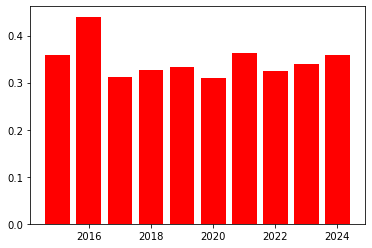

In [73]:
z = res[['game_year','obp']]
x = z.game_year
y = z.obp
plt.bar(x,y,color = '#ff0000')
#plt.text(x=x,y=y,s=y)
plt.show()

In [74]:
# It is Schwarber's highest OBP as a Phillie

# Phillies Fastball Velo by Year

In [75]:
df = pitch_mix_by_group(pps[pps.pitch_type == 'FF'],'game_year')

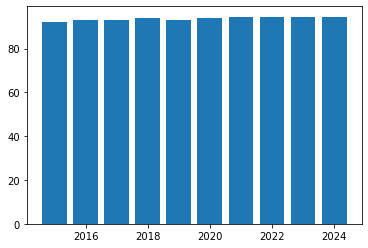

In [76]:
df[['game_year','release_speed']].sort_values(by='release_speed',ascending=False).round(2)
x = df.game_year
y = df.release_speed
plt.bar(x,y)
plt.show()

# Pitch Mix vs Homer Pitch Mix

In [77]:
bohm_hrs = bohm[bohm.events == 'home_run']
pm = pitch_mix(bohm)
pmh = pitch_mix(bohm_hrs)

In [78]:
df = pm.merge(pmh, on = 'pitch_type', suffixes = ('','_hr'))

In [79]:
z = df[['pitch_type'
    ,'pitch_name'
    ,'usage'
    ,'usage_hr'
    ,'count'
    ,'count_hr'
   ]]
z['diff'] = z.usage - z.usage_hr
z.sort_values(by='diff',ascending=True)
# Bohm crushes changeups

,pitch_type,pitch_name,usage,usage_hr,count,count_hr,diff
3,CH,Changeup,7.5,18.6,690,11,-11.1
0,FF,4-Seam Fastball,33.1,37.3,3052,22,-4.2
5,CU,Curveball,5.8,8.5,535,5,-2.7
2,SL,Slider,18.5,16.9,1712,10,1.6
4,FC,Cutter,7.5,5.1,690,3,2.4
1,SI,Sinker,20.3,13.6,1872,8,6.7


# WAS (H) 815-818

## Game 1: Parker vs Wheeler

The boys brought the boom tonight. Weston Wilson hit for the cycle. Nice.

In [80]:
po = pos[pos.game_date == '2024-08-15']
po

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
206282,FF,2024-08-15,92.8,1.40,6.31,"Harper, Bryce",547180,680730,single,hit_into_play,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
206283,SL,2024-08-15,84.4,2.33,5.81,"Harper, Bryce",547180,680730,NaN,foul,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
206284,FF,2024-08-15,92.5,1.33,6.38,"Harper, Bryce",547180,680730,NaN,foul,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
206285,FF,2024-08-15,93.0,1.36,6.44,"Harper, Bryce",547180,680730,NaN,foul,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
206286,SL,2024-08-15,83.2,2.03,5.99,"Harper, Bryce",547180,680730,NaN,foul,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206434,FF,2024-08-15,93.7,1.68,6.16,"Schwarber, Kyle",656941,680730,NaN,foul,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
206435,CH,2024-08-15,83.5,-1.66,6.51,"Harper, Bryce",547180,687377,NaN,swinging_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
206436,FF,2024-08-15,94.5,1.56,6.25,"Schwarber, Kyle",656941,680730,NaN,ball,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
206437,FF,2024-08-15,93.5,-2.66,6.41,"Bohm, Alec",664761,663432,NaN,ball,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168


In [81]:
po.groupby(['player_name','batter']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

,player_name,batter,at_bat_number,des,launch_speed,launch_angle,estimated_ba_using_speedangle
0,"Bohm, Alec",664761,5,8,92.075,22.250,2.006
1,"Castellanos, Nick",592206,5,12,87.017,23.000,1.438
2,"Harper, Bryce",547180,5,19,87.833,34.444,2.272
3,"Realmuto, J.T.",592663,5,21,79.400,15.167,1.268
4,"Rojas, Johan",679032,5,25,84.450,40.500,1.307
5,"Schwarber, Kyle",656941,6,25,88.275,46.375,0.923
6,"Sosa, Edmundo",624641,1,3,70.500,68.000,0.000
7,"Stott, Bryson",681082,4,7,70.333,13.667,0.220
8,"Turner, Trea",607208,5,19,92.729,16.714,1.481
9,"Wilson, Weston",642215,5,18,86.257,25.429,1.368


In [82]:
pp = pps[pps.game_date == '2024-08-15']
pp

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
205410,ST,2024-08-15,85.1,-2.15,5.20,"Wheeler, Zack",665953,554430,field_out,hit_into_play,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
205411,FF,2024-08-15,95.2,-2.10,5.15,"Wheeler, Zack",665953,554430,NaN,ball,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
205412,ST,2024-08-15,86.4,-2.06,5.17,"Wheeler, Zack",665953,554430,NaN,called_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
205413,SI,2024-08-15,95.3,-2.03,5.21,"Wheeler, Zack",665953,554430,NaN,foul_tip,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
205414,FF,2024-08-15,95.7,-2.11,5.31,"Wheeler, Zack",695578,554430,field_out,hit_into_play,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205550,FC,2024-08-15,91.3,-2.16,5.32,"Wheeler, Zack",682928,554430,NaN,ball,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
205551,FF,2024-08-15,95.0,-0.54,6.04,"Lazar, Max",660688,676661,NaN,ball,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
205552,SL,2024-08-15,85.3,2.79,6.37,"Banks, Tanner",682928,621383,field_out,hit_into_play,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
205553,ST,2024-08-15,86.4,-1.63,5.62,"Kerkering, Orion",671277,689147,NaN,called_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168


In [83]:
pp.groupby(['player_name','pitcher']
           ,as_index=False
          ).agg({'at_bat_number' : 'nunique'
                 ,'des' : 'count'
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'sum'
                }).round(3)

,player_name,pitcher,at_bat_number,des,launch_speed,launch_angle,estimated_ba_using_speedangle
0,"Banks, Tanner",621383,5,10,80.183,10.333,2.003
1,"Kerkering, Orion",689147,5,19,87.333,19.500,1.351
2,"Lazar, Max",676661,4,20,82.783,23.167,0.917
3,"Wheeler, Zack",554430,22,96,79.240,23.467,3.816


## Game 2: Corbin vs Nola

In [84]:
#pos[pos.des.str.contains('Patrick Corbin')].groupby('pitcher',as_index=False).agg({'des' : 'count'})
corbin_id = 571578
pc = pd.concat([pos[pos.pitcher == corbin_id]
                ,nphl[nphl.pitcher == corbin_id]
               ])
df = pc
res = results('player_name')
res
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Bohm, Alec'
          ,'Castellanos, Nick'
          ,'Sosa, Edmundo'
          ,'Wilson, Weston'
          ,'Rojas, Johan'
          ,'Realmuto, J.T.'
          ,'Stott, Bryson'
          ,'Marsh, Brandon'
         ]
res[res.player_name.isin(lineup)]

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
4,"Bohm, Alec",114,30,23.0,10.0,2.0,3.0,4.0,0.370,0.433,0.704,1.137,0.475
7,"Castellanos, Nick",61,17,11.0,3.0,0.0,2.0,4.0,0.200,0.294,0.200,0.494,0.237
18,"Harper, Bryce",190,48,28.0,12.0,0.0,9.0,11.0,0.308,0.438,0.410,0.848,0.381
31,"Marsh, Brandon",6,3,2.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
43,"Realmuto, J.T.",155,43,31.0,14.0,2.0,4.0,7.0,0.378,0.442,0.595,1.036,0.439
45,"Rojas, Johan",22,7,5.0,1.0,0.0,0.0,2.0,0.143,0.143,0.143,0.286,0.126
49,"Schwarber, Kyle",101,26,16.0,6.0,2.0,5.0,5.0,0.286,0.423,0.571,0.995,0.429
51,"Sosa, Edmundo",12,4,3.0,2.0,0.0,0.0,0.0,0.667,0.750,1.333,2.083,0.801
52,"Stott, Bryson",52,15,12.0,5.0,0.0,2.0,1.0,0.385,0.467,0.615,1.082,0.460
54,"Turner, Trea",55,14,12.0,4.0,0.0,1.0,1.0,0.308,0.357,0.462,0.819,0.356


Based off of previous at bats against Patrick Corbin, the Phillies should trot out this lineup tonight.
1. Kyle Schwarber 0
2. Nick Castellanos 9
3. Bryce Harper 3
4. Alec Bohm 5
5. J.T. Realmuto 2
6. Bryson Stott 4
7. Weston Wilson 7
8. Brandon Marsh 8
9. Edmundo Sosa 6

Call me crazy, I know Topper won't do it. Let's check Trea Turner's at bats against Corbin and guys like Corbin.

In [85]:
df = pc[pc.player_name == 'Turner, Trea']
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2018,14,4,2,0.0,0.0,1.0,1.0,0.000,0.250,0.000,0.250,0.172
1,2022,6,1,1,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
2,2023,6,2,2,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
3,2024,29,7,7,4.0,0.0,0.0,0.0,0.571,0.571,0.857,1.429,0.613


In [86]:
df[df.type=='X'][['game_date','inning'
                  ,'balls','strikes'
                  ,'estimated_ba_using_speedangle'
                  ,'launch_speed'
                  ,'launch_angle'
                  ,'events'
                  ,'hit_location'
                 ]].sort_values(by=['game_date','inning'])

,game_date,inning,balls,strikes,estimated_ba_using_speedangle,launch_speed,launch_angle,events,hit_location
208527,2018-04-28,5,0,0,0.120,75.7,-5.0,field_out,4.0
208524,2018-04-28,7,1,1,0.447,105.3,0.0,grounded_into_double_play,4.0
60953,2022-07-27,1,3,2,0.274,97.7,20.0,field_out,9.0
185019,2023-08-10,2,1,0,0.874,82.8,14.0,field_out,6.0
184969,2023-08-10,4,1,2,0.140,93.5,-21.0,field_out,4.0
223286,2024-04-05,1,2,2,0.006,67.3,63.0,field_out,6.0
223218,2024-04-05,2,0,2,0.103,81.5,-44.0,field_out,5.0
223188,2024-04-05,5,0,0,0.071,83.3,-26.0,field_out,6.0
223166,2024-04-05,7,0,0,0.654,104.6,20.0,double,9.0
206256,2024-08-16,1,3,1,0.840,105.6,10.0,single,9.0


In [87]:
pc[pc.pitch_type.isin(['FF','SI'])].agg({'release_speed' : ['mean','std']}).round(2)

,release_speed
mean,92.25
std,1.55


In [88]:
pitch_mix(pc[pc.game_year==2024])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
5,SL,Slider,66,80.674242,2125.666667,10.863636,34.9
4,SI,Sinker,60,91.091667,2065.283333,9.416667,31.7
2,FC,Cutter,29,86.562069,2226.068966,7.862069,15.3
3,FF,4-Seam Fastball,24,90.887500,2075.791667,8.416667,12.7
1,CU,Curveball,7,72.228571,1963.142857,9.000000,3.7
0,CH,Changeup,3,78.466667,1334.333333,12.000000,1.6


In [89]:
df = trea[(trea.p_throws=='L')
     &(trea.pitch_type.isin(['FF','SI']))
     #&(trea.zone.isin([3,6,9]))
          &(trea.release_speed >= 90-1.57)
          &(trea.release_speed <= 90+1.57)
    ]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2015,9,2,2,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
1,2016,53,13,12,7.0,1.0,1.0,0.0,0.583,0.615,1.083,1.699,0.695
2,2017,82,18,12,2.0,0.0,2.0,4.0,0.125,0.222,0.188,0.410,0.194
3,2018,129,39,32,8.0,1.0,6.0,1.0,0.242,0.359,0.424,0.783,0.343
4,2019,105,24,19,9.0,1.0,1.0,4.0,0.391,0.417,0.609,1.025,0.429
5,2020,35,8,8,3.0,1.0,0.0,0.0,0.375,0.375,1.125,1.500,0.597
6,2021,63,14,12,5.0,1.0,2.0,0.0,0.417,0.500,0.750,1.250,0.519
7,2022,78,22,15,4.0,1.0,1.0,6.0,0.200,0.227,0.350,0.577,0.246
8,2023,108,26,23,5.0,0.0,1.0,2.0,0.200,0.231,0.200,0.431,0.197
9,2024,46,18,16,7.0,1.0,0.0,2.0,0.389,0.389,0.722,1.111,0.472


Trea could do all right against Corbin.

## Game 3: Gore vs Sanchez

The Sanchize threw a complete game.

## Game 4: Irvin vs Walker

L

# ATL (A) 820-822
Big series. The Braves are banged up, the Phillies are starting to build some momentum. They could bury the Braves in the next two weeks.

## Game 1: Lopez vs Wheeler

In [90]:
# Does Zack Wheeler establish the fastball?

In [91]:
# Wheeler OPS vs RHB is .415!
df = wheeler[wheeler.stand=='R']
results('player_name') # Kellen has .149 BA, a .197 OBP, and a .413 OPS.

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Wheeler, Zack",1181,307,200,46,5,10,91,0.159,0.199,0.239,0.437,0.196


In [92]:
df = wheeler
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Wheeler, Zack",2657,666,429,119,17,45,183,0.195,0.258,0.33,0.588,0.261


In [93]:
zw = wheeler

In [94]:
zwff = zw[zw.pitch_type.isin(['FF','SI'])].groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })
zwi = zw.groupby('inning',as_index=False).agg({'release_speed' : 'mean'
                                        ,'des' : 'count'
                                        })

In [95]:
x = zwi.merge(zwff,on = 'inning')
x['usage'] = x.des_y / x.des_x

In [96]:
x
# Long story short: Yes, Zack Wheeler throws more fastballs early in the game and he throws the ball harder.

,inning,release_speed_x,des_x,release_speed_y,des_y,usage
0,1,93.324641,418,95.955782,294,0.703349
1,2,91.831373,409,95.283004,253,0.618582
2,3,91.039565,460,94.844030,268,0.582609
3,4,90.732464,422,94.713693,241,0.571090
4,5,90.545794,428,94.715678,236,0.551402
5,6,90.224522,314,94.241143,175,0.557325
6,7,90.461622,185,94.405882,102,0.551351
7,8,90.047619,21,94.327273,11,0.523810


In [97]:
z = zw.groupby(['game_pk','game_date']
           ,as_index=False
          ).agg({'des' : 'count'
                 ,'inning' : 'nunique'
                }
               ).sort_values(by='game_date',ascending=False)

<BarContainer object of 27 artists>

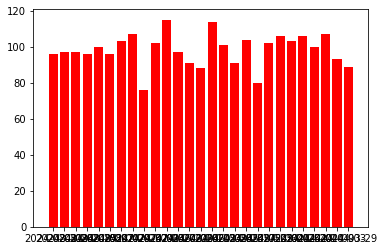

In [98]:
x = z.game_date
y = z.des
plt.bar(x,y,color='#ff0000')

In [99]:
pp24.groupby(['game_pk','inning','game_date','player_name']
             ,as_index=False
            ).agg({'des' : 'count'}).sort_values(by='des',ascending=False).head(5)

,game_pk,inning,game_date,player_name,des
713,745589,2,2024-05-03,"Nola, Aaron",46
312,745547,5,2024-07-29,"Wheeler, Zack",37
830,745600,10,2024-04-01,"Brogdon, Connor",37
1278,747164,7,2024-08-10,"Marte, Yunior",36
930,745881,8,2024-07-22,"Marte, Yunior",36


In [100]:
pp24[pp24.pitch_number==1].groupby('description',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

,description,des
0,ball,1758
3,called_strike,1538
4,foul,631
8,hit_into_play,615
10,swinging_strike,374
1,blocked_ball,83
6,foul_tip,36
5,foul_bunt,25
7,hit_by_pitch,17
11,swinging_strike_blocked,7


In [101]:
balls = ['ball'
         ,'blocked_ball'
        ]
first_pitches = pp24[pp24.pitch_number==1]
fp = first_pitches.groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fpb = first_pitches[first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

fps = first_pitches[~first_pitches.description.isin(balls)].groupby(['player_name','pitcher']
                      ,as_index=False
                     ).agg({'des' : 'count'})

In [102]:
z = fp.merge(fpb, on = ['player_name','pitcher'], suffixes = ('','_b'))
z['strikes'] = z.des - z.des_b
z['first_pitch_strike%'] = z.strikes/z.des
z.round(3).sort_values(by='first_pitch_strike%',ascending=False)

,player_name,pitcher,des,des_b,strikes,first_pitch_strike%
0,"Allard, Kolby",663465,73,19,54,0.740
2,"Banks, Tanner",621383,53,15,38,0.717
5,"Estévez, Carlos",608032,56,17,39,0.696
7,"Hoffman, Jeff",656546,234,77,157,0.671
6,"Gilbert, Tyler",656457,9,3,6,0.667
12,"Nelson, Nick",656793,15,5,10,0.667
13,"Nola, Aaron",605400,702,238,464,0.661
18,"Strahm, Matt",621381,201,69,132,0.657
24,"Wheeler, Zack",554430,665,229,436,0.656
21,"Sánchez, Cristopher",650911,633,221,412,0.651


In [103]:
ok = pps[pps.pitcher == 689147]
pitch_mix(ok)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,ST,Sweeper,613,86.139804,2913.625624,9.698206,56.9
0,FF,4-Seam Fastball,285,97.589825,2361.469314,7.870175,26.4
1,SI,Sinker,180,96.691667,2263.437500,8.711111,16.7


In [104]:
ja = pp24[pp24.pitcher == 621237]
pitch_mix(ja)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
2,SI,Sinker,545,97.806789,2075.820268,7.768807,59.6
1,FC,Cutter,367,92.575749,2101.215297,10.591281,40.1
0,CU,Curveball,3,85.366667,2587.000000,9.333333,0.3


In [105]:
gms = ja.groupby(['game_pk','game_date']
           ,as_index=False).agg({'des' : 'count'})

gmsfc = ja[ja.pitch_type == 'FC'].groupby(['game_pk','game_date']
                                          ,as_index=False).agg({'des' : 'count'})

z = gms.merge(gmsfc, on = ['game_pk','game_date'], suffixes = ('','_fc'))
z['si'] = z.des - z.des_fc
z['usage'] = z.si/z.des
z.round(3).sort_values(by='usage',ascending=False)

,game_pk,game_date,des,des_fc,si,usage
31,745594,2024-04-13,10,1,9,0.900
1,744874,2024-04-05,17,3,14,0.824
43,746456,2024-06-26,16,3,13,0.812
22,745572,2024-06-02,9,2,7,0.778
35,745826,2024-05-13,9,2,7,0.778
4,745225,2024-08-03,16,4,12,0.750
40,746239,2024-04-30,11,3,8,0.727
0,744873,2024-04-06,28,8,20,0.714
52,747169,2024-08-08,24,7,17,0.708
51,747166,2024-08-11,19,6,13,0.684


<BarContainer object of 53 artists>

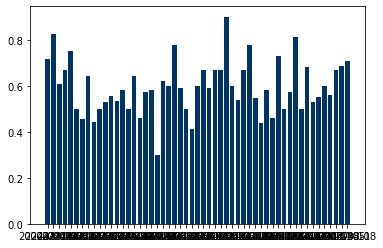

In [106]:
x = z.game_date
y = z.usage
plt.bar(x,y,color = '#003469')

Feels shitty to lose a Wheeler start, especially when this series feels like a big opportunity for the Fightins.

## Game 2: Fried vs Nola

## Game 3: Schwellenbach vs Sanchez

Brutal.

# KCR (A) 823-825
When was the last time the Phillies were in Kansas City? How do the Phillies batters perform there?

In [107]:
kc = pos[pos.home_team == 'KC']
kc.groupby('game_date',as_index=False).agg({'des' : 'count'
                                            ,'inning' : 'nunique'
                                            ,'game_year' : 'max'
                                           })

,game_date,des,inning,game_year
0,2019-05-10,143,9,2019
1,2019-05-11,193,9,2019
2,2019-05-12,149,9,2019
3,2024-08-23,144,9,2024
4,2024-08-24,173,9,2024
5,2024-08-25,165,9,2024


In [108]:
kc[kc.game_year != 2024].groupby('player_name'
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                      }).sort_values(by='des',ascending=False)

# Back in May 2019, the Phillies were led by Andrew McCutchen, Bryce Harper, Hoskins, and JT.

,player_name,des,game_pk
6,"McCutchen, Andrew",69,3
1,"Harper, Bryce",66,3
4,"Hoskins, Rhys",65,3
7,"Realmuto, J.T.",51,3
8,"Segura, Jean",50,3
2,"Hernández, César",49,3
3,"Herrera, Odúbel",49,3
0,"Franco, Maikel",39,3
9,"Williams, Nick",28,2
5,"Knapp, Andrew",19,1


In [109]:
df = pps[pps.home_team == 'KC']
results('player_name')
# The games were started by Zach Eflin, JAke Arrieta, and Cole Irvin?

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Allard, Kolby",81,23,18,8.0,2.0,0.0,5.0,0.348,0.348,0.696,1.043,0.443
1,"Alvarado, José",39,9,6,2.0,0.0,1.0,2.0,0.250,0.333,0.500,0.833,0.357
2,"Alvarez, Jose",4,1,1,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
3,"Arrieta, Jake",99,24,16,7.0,3.0,3.0,5.0,0.333,0.417,0.762,1.179,0.474
4,"Banks, Tanner",12,3,3,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
5,"Domínguez, Seranthony",15,4,2,1.0,0.0,0.0,2.0,0.250,0.250,0.250,0.500,0.218
6,"Eflin, Zach",110,31,22,4.0,0.0,0.0,7.0,0.138,0.194,0.172,0.366,0.170
7,"Estévez, Carlos",12,3,3,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
8,"García, Edgar",9,2,1,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
9,"Gilbert, Tyler",42,9,7,2.0,0.0,1.0,1.0,0.250,0.333,0.375,0.708,0.315


In [110]:
pokc = pos[(pos.home_team == 'KC')
           &(pos.game_year != 2024)
          ]
ppkc = pps[(pps.home_team == 'KC')
           &(pps.game_year != 2024)
          ]

In [111]:
df = ppkc
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Alvarez, Jose",4,1,1,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
1,"Arrieta, Jake",99,24,16,7.0,3.0,3.0,5.0,0.333,0.417,0.762,1.179,0.474
2,"Domínguez, Seranthony",15,4,2,1.0,0.0,0.0,2.0,0.250,0.250,0.250,0.500,0.218
3,"Eflin, Zach",110,31,22,4.0,0.0,0.0,7.0,0.138,0.194,0.172,0.366,0.170
4,"García, Edgar",9,2,1,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
5,"Irvin, Cole",93,27,21,5.0,0.0,1.0,5.0,0.192,0.222,0.192,0.415,0.187
6,"Neris, Hector",21,5,2,0.0,0.0,2.0,1.0,0.000,0.400,0.000,0.400,0.276
7,"Nicasio, Juan",14,4,3,0.0,0.0,1.0,0.0,0.000,0.250,0.000,0.250,0.172
8,"Ramos, Edubray",12,3,3,1.0,0.0,0.0,0.0,0.333,0.333,0.333,0.667,0.290


## Game 1: Wacha vs Walker
Tai Walker is not good. The Phillies are going through it at the moment.

## Game 2: Singer vs Suarez

In [112]:
pos[(pos.away_team == 'KC')
    &(pos.game_year == 2023)
   ].groupby(['pitcher','game_pk','game_date'
             ],as_index=False
            ).agg({'des' : 'count'
                   ,'inning' : 'nunique'
                  }).sort_values(by='des',ascending=False)

,pitcher,game_pk,game_date,des,inning
1,543475,717140,2023-08-04,91,6
9,679525,717123,2023-08-05,66,4
0,425844,717113,2023-08-06,59,4
8,672582,717123,2023-08-05,45,3
5,669169,717113,2023-08-06,27,2
4,663704,717113,2023-08-06,24,2
7,672578,717140,2023-08-04,18,1
2,621295,717140,2023-08-04,16,1
3,656353,717123,2023-08-05,11,1
6,669395,717140,2023-08-04,11,1


In [113]:
lineup = ['Schwarber, Kyle',
 'Turner, Trea',
 'Harper, Bryce',
 'Bohm, Alec',
 'Castellanos, Nick',
 #'Sosa, Edmundo',
 #'Wilson, Weston',
 #'Rojas, Johan',
 'Realmuto, J.T.',
 'Stott, Bryson',
 'Marsh, Brandon'
         ,'Hays, Austin']

In [114]:
singer_id = 663903
df = nphl[nphl.pitcher == singer_id]
bs_res = results('player_name')
bs_res[bs_res.player_name.isin(lineup)]
# The Phillies have not faced Brady Singer much. The few guys who have do not perform well.

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
4,"Hays, Austin",10,3,2.0,1.0,0.0,0.0,1.0,0.333,0.333,0.333,0.667,0.294
8,"Schwarber, Kyle",10,2,0.0,0.0,0.0,0.0,2.0,0.000,0.000,0.000,0.000,0.000
9,"Turner, Trea",16,3,2.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000


## Game 3: Lugo vs Wheeler

# HOU (H) 826-828
## Game 1: 
## Game 2: Verlander vs Nola - W
## Game 3: Arrighetti vs Walker - L

# ATL (H) 829-91


## Game 1: Morton vs Sanchez


## Game 2: Lopez vs Suarez


In [115]:
po24

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
204023,SL,2024-09-01,87.2,-2.40,5.60,"Castellanos, Nick",592206,680885,double,hit_into_play,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
204024,SL,2024-09-01,87.3,-2.40,5.60,"Castellanos, Nick",592206,680885,NaN,called_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
204025,FF,2024-09-01,95.4,-2.28,5.62,"Castellanos, Nick",592206,680885,NaN,called_strike,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
204026,CU,2024-09-01,81.5,-2.37,5.41,"Harper, Bryce",547180,680885,double,hit_into_play,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
204027,FF,2024-09-01,95.8,-2.50,5.61,"Harper, Bryce",547180,680885,NaN,ball,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224171,SL,2024-03-29,83.8,-2.59,5.53,"Harper, Bryce",547180,641729,NaN,ball,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
224172,FC,2024-03-29,89.1,3.26,5.17,"Realmuto, J.T.",592663,607481,NaN,ball,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
224173,CU,2024-03-29,84.0,-2.24,6.40,"Castellanos, Nick",592206,572955,NaN,foul,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168
224174,FF,2024-03-29,96.2,-1.70,5.94,"Schwarber, Kyle",656941,675911,field_out,hit_into_play,...,0.723,0.885,1.261,1.599,2.062,0.2,-0.405,0.117,9.674,3.168


In [116]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Stott, Bryson'
          ,'Realmuto, J.T.'
          ,'Marsh, Brandon'
          #,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan' # bc Hays still gets the occasional day off as he works his way back.
         ]
#df = [po24.player_name.isin(lineup)]
#res = results('player_name')

In [117]:
# Ranger first time in City Connects?
df = pp24
df['date'] = pd.to_datetime(df.game_date)
df['dow'] = df.date.dt.month
#df['dow'] = df.dt.month

In [118]:
# Performance by Position and Month

In [119]:
c_ids = pp24.fielder_2.unique().tolist()
c = po24[po24.batter.isin(c_ids)]

In [120]:
c['date']=pd.to_datetime(c.game_date)
c['month'] = c.date.dt.month

df = c
results('month')
# And you can see that the Phillies catchers enjoyed a strong May.

,month,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,3,46,12,6,3.0,1.0,2.0,4,0.300,0.417,0.600,1.017,0.435
1,4,456,120,82,25.0,4.0,6.0,30,0.223,0.267,0.357,0.624,0.274
2,5,461,121,83,32.0,2.0,8.0,30,0.283,0.331,0.398,0.729,0.321
3,6,386,102,68,20.0,3.0,6.0,26,0.215,0.275,0.333,0.608,0.270
4,7,390,96,61,19.0,1.0,10.0,20,0.232,0.344,0.317,0.661,0.305
5,8,425,111,81,29.0,4.0,7.0,21,0.284,0.342,0.510,0.852,0.367
6,9,15,4,3,0.0,0.0,0.0,1,0.000,0.000,0.000,0.000,0.000


In [121]:
pp24[pp24.p_throws=='L'].groupby(['pitcher','player_name']
                                 ,as_index=False
                                ).agg({'des' : 'count'
                                       ,'game_pk' : 'nunique'
                                       #
                                      })
rs_id = 624133
rs24 = pp24[pp24.pitcher==rs_id]
rs = pps[pps.pitcher==rs_id]

In [122]:
rs24.groupby('game_date',as_index=False
            ).agg({'pitch_number' : 'sum'
                   ,'at_bat_number' : 'nunique'
                   ,'des' : 'count'
                   ,'pitch_type' : 'nunique'
                  }).sort_values(by='game_date',ascending=False)

,game_date,pitch_number,at_bat_number,des,pitch_type
21,2024-08-30,251,18,78,5
20,2024-08-24,214,20,72,5
19,2024-07-22,207,24,79,5
18,2024-07-12,253,27,97,5
17,2024-07-06,259,23,91,5
16,2024-06-30,267,26,91,5
15,2024-06-25,217,26,88,5
14,2024-06-19,299,23,94,5
13,2024-06-14,210,27,88,5
12,2024-06-08,216,27,89,5


In [123]:
# How does Ranger attack RHBs?
df = rs_rhb = rs[rs.stand == 'R']
res = results('game_year')
pitch_mix(df)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
4,SI,Sinker,2265,92.345475,1902.406961,9.109492,29.3
0,CH,Changeup,1750,83.757543,1462.925691,11.658857,22.6
3,FF,4-Seam Fastball,1731,93.006932,1964.559115,7.888504,22.4
1,CU,Curveball,997,75.530993,2190.211019,10.962889,12.9
2,FC,Cutter,720,88.146250,2047.194640,8.500000,9.3
5,SL,Slider,276,84.132971,2092.783465,10.340580,3.6


In [124]:
res

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2018,146,47,40,16,3,4,3,0.381,0.426,0.690,1.116,0.462
1,2019,524,137,100,39,5,7,28,0.305,0.336,0.461,0.797,0.335
2,2020,51,16,12,6,1,2,1,0.462,0.562,0.846,1.409,0.577
3,2021,1206,304,208,62,4,22,70,0.225,0.289,0.301,0.590,0.264
4,2022,2252,578,402,131,14,58,115,0.254,0.329,0.407,0.736,0.324
5,2023,1972,506,339,118,13,47,117,0.261,0.330,0.400,0.730,0.319
6,2024,1588,423,289,86,8,26,103,0.219,0.272,0.331,0.603,0.268


In [125]:
po24['date'] = pd.to_datetime(po24['game_date'])
po24['dow'] = po24.date.dt.dayofweek

In [126]:
df=po24

In [127]:
df.groupby('dow',as_index=False).agg({'des' :'count', 'game_date':'max'})

,dow,des,game_date
0,0,2210,2024-08-26
1,1,3047,2024-08-27
2,2,3109,2024-08-28
3,3,1681,2024-08-29
4,4,3267,2024-08-30
5,5,3397,2024-08-31
6,6,3442,2024-09-01


In [128]:
df = po24[(po24.dow == 4)&(po24.home_team == 'PHI')]
results('player_name').sort_values(by='ops',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
14,"Stevenson, Cal",2,1,1,1.0,0.0,0.0,0.0,1.000,1.000,1.000,2.000,0.885
16,"Stubbs, Garrett",15,3,2,1.0,0.0,1.0,0.0,0.500,0.667,0.500,1.167,0.525
7,"Marsh, Brandon",154,33,17,8.0,1.0,4.0,12.0,0.276,0.364,0.517,0.881,0.380
4,"Harper, Bryce",199,44,28,10.0,0.0,9.0,7.0,0.286,0.432,0.429,0.860,0.385
13,"Sosa, Edmundo",78,20,16,6.0,1.0,0.0,4.0,0.300,0.300,0.500,0.800,0.343
17,"Turner, Trea",180,41,31,13.0,1.0,0.0,9.0,0.317,0.317,0.463,0.780,0.337
0,"Bohm, Alec",161,44,36,11.0,2.0,2.0,6.0,0.262,0.295,0.452,0.748,0.323
15,"Stott, Bryson",156,37,31,9.0,2.0,1.0,4.0,0.265,0.297,0.441,0.738,0.317
8,"Merrifield, Whit",41,12,11,2.0,1.0,0.0,1.0,0.167,0.167,0.417,0.583,0.246
3,"Dahl, David",9,2,1,0.0,0.0,1.0,0.0,0.000,0.500,0.000,0.500,0.346


In [129]:
# how is Austin Hays's defense?

## Game 3: Fried vs Wheeler

In [133]:
pos[pos.des.str.contains('Fried')][['pitcher','home_team','away_team','game_date','des']]
fried_id = 608331
pos[pos.pitcher == fried_id].groupby(['game_pk'
                                      ,'game_date'
                                     ],as_index=False
                                    ).agg({'des' : 'count'
                                             ,'at_bat_number' : 'nunique'
                                             ,'pitch_type' : 'nunique'
                                             ,'release_speed' : 'mean'
                                           ,'inning' : 'nunique'
                                            }).round(2).sort_values(by='game_date',ascending=False)

,game_pk,game_date,des,at_bat_number,pitch_type,release_speed,inning
20,745532,2024-08-31,103,28,6,88.97,7
22,747084,2024-08-21,91,24,6,89.01,7
23,747097,2024-07-05,103,31,6,86.95,6
21,745599,2024-03-30,43,7,6,88.57,1
24,748563,2023-10-09,95,22,6,84.92,4
19,716618,2023-09-12,87,20,6,87.17,5
18,715743,2022-10-11,61,20,5,86.54,4
17,661609,2022-09-22,107,21,5,87.85,5
14,661473,2022-09-16,110,24,5,87.04,6
16,661555,2022-07-25,103,27,5,86.62,6


## Game 4: Schwellenbach vs Nola

Phillies win on a walk off. Nice work taking 3 of 4, fellas.